## 1 - Setups

### 1.1 - Importing Libraries

In [1]:
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
import torch.optim as optim


### 1.2 - GPU

In [2]:
if torch.backends.mps.is_available():
	device = torch.device("mps")
	x = torch.ones(1, device=device)
	print(x)

elif torch.backends.cuda.is_built():
	device = torch.device("cuda")
	x = torch.ones(1, device=device)
	print (x)
else:
	device = None
	print ("MPS device not found.")

tensor([1.], device='mps:0')


## 2 - Preparation

### 2.1 - Data Paths

In [3]:
TRAIN_DATA_PATH = "data/train/train"
TEST_DATA_PATH = "data/test/test"

### 2.2 - Look at Original Data

Let's look at the original data and see what we have to work with.

Number of training images: 9025
0. Zuchon (https://simple.wikipedia.org/wiki/Zuchon)


1. Rhodesian Ridgeback (https://en.wikipedia.org/wiki/Rhodesian_Ridgeback)


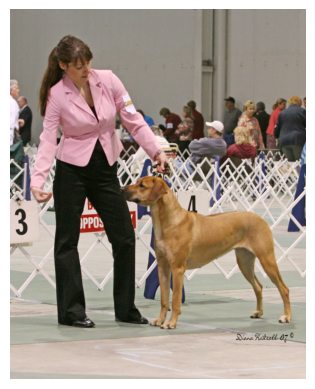

2. Beagle (https://en.wikipedia.org/wiki/Beagle)


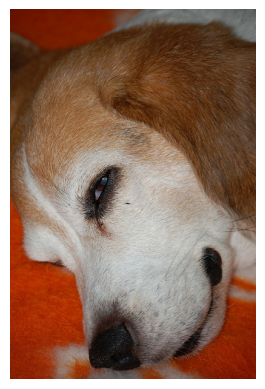

3. American Foxhound (https://en.wikipedia.org/wiki/American_Foxhound)


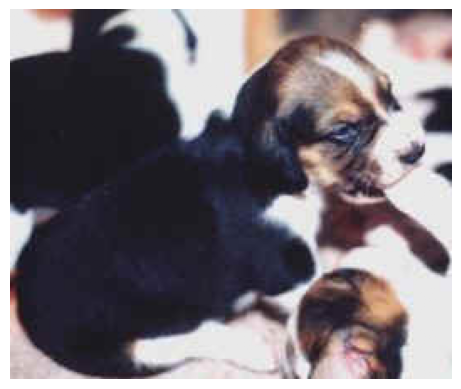

4. Border Terrier (https://en.wikipedia.org/wiki/Border_Terrier)


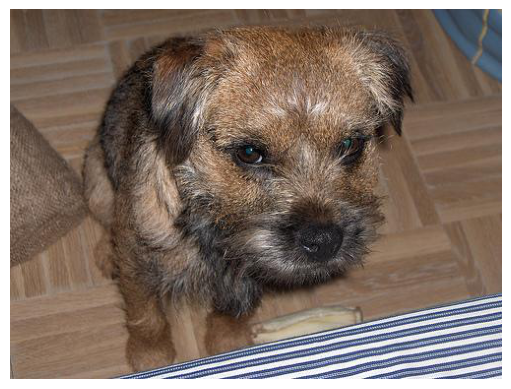

5. Australian Terrier (https://en.wikipedia.org/wiki/Australian_Terrier)


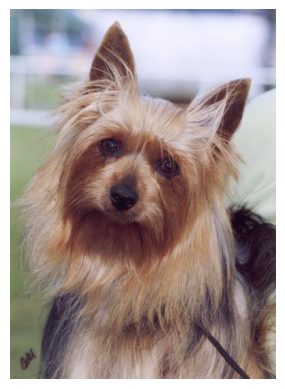

6. Golden Retriever (https://en.wikipedia.org/wiki/Golden_Retriever)


7. Old English Sheepdog (https://en.wikipedia.org/wiki/Old_English_Sheepdog)


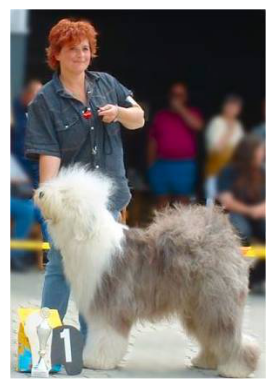

8. Samoyed (https://en.wikipedia.org/wiki/Samoyed_dog)


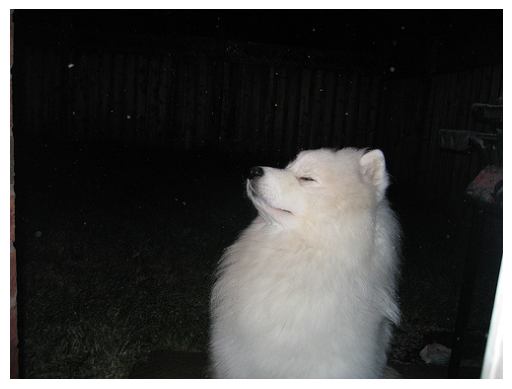

9. Carolina Dog (https://en.wikipedia.org/wiki/Carolina_Dog)


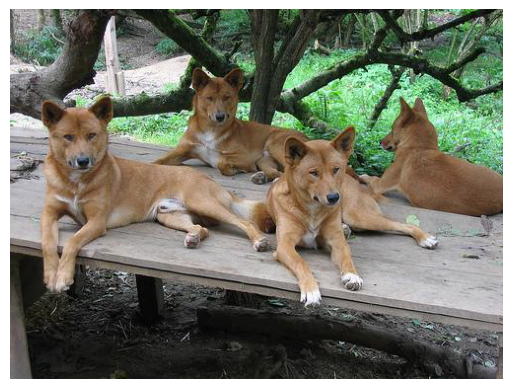

In [4]:
original_unaltered_training_dataset = datasets.ImageFolder(
    TRAIN_DATA_PATH,
    transform=transforms.Compose([transforms.ToTensor()])
)

num_of_training_images = len(original_unaltered_training_dataset)

print(f'Number of training images: {num_of_training_images}')

DOG_BREEDS = [
    [0, 'Zuchon', 'https://simple.wikipedia.org/wiki/Zuchon'],
    [1, 'Rhodesian Ridgeback', 'https://en.wikipedia.org/wiki/Rhodesian_Ridgeback'],
    [2, 'Beagle', 'https://en.wikipedia.org/wiki/Beagle'],
    [3, 'American Foxhound', 'https://en.wikipedia.org/wiki/American_Foxhound'],
    [4, 'Border Terrier', 'https://en.wikipedia.org/wiki/Border_Terrier'],
    [5, 'Australian Terrier', 'https://en.wikipedia.org/wiki/Australian_Terrier'],
    [6, 'Golden Retriever', 'https://en.wikipedia.org/wiki/Golden_Retriever'],
    [7, 'Old English Sheepdog', 'https://en.wikipedia.org/wiki/Old_English_Sheepdog'],
    [8, 'Samoyed', 'https://en.wikipedia.org/wiki/Samoyed_dog'],
    [9, 'Carolina Dog', 'https://en.wikipedia.org/wiki/Carolina_Dog'],
]

for i_training_dataset in range(0, num_of_training_images, 1000):
    img = original_unaltered_training_dataset[i_training_dataset][0]
    label = original_unaltered_training_dataset[i_training_dataset][1]
    print(f'{DOG_BREEDS[label][0]}. {DOG_BREEDS[label][1]} ({DOG_BREEDS[label][2]})')
    # show the image
    plt.imshow(img.permute(1, 2, 0))
    plt.axis('off') # make image a bit smaller
    plt.show();

### 2.3 - Transform Input Images

From the paper: "The image is resized with its shorter side randomly sampled in [256, 480] for scale augmentation [41]. A 224×224 crop is randomly sampled from an image or its horizontal ﬂip, with the per-pixel mean subtracted [21]. The standard color augmentation in [21] is used."

#### 2.1.1 - Resize to 256 x 480

- Image is resized with shorter side randomly sampled in [256, 480].

#### 2.1.2 - Scale Augmentation

- [41] https://arxiv.org/pdf/1409.1556.pdf

#### 2.1.3 - Crop to 224 x 224

- A 224×224 crop is randomly sampled from an image or its horizontal ﬂip.

#### 2.1.4 - Mean Substraction

- The per-pixel mean is subtracted [21] https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

#### 2.1.5 - Color Augmentation

- [21] https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

#### 2.1.6 - Putting It All Together

In [5]:
# Define transformations
transformations = transforms.Compose(
    [
        # TODO: Resize to 256 x 480
        # TODO: Scale Augmentation
        transforms.Resize((224, 224)),  # Crop to 224 x 224 ?
        transforms.ToTensor(),  # Convert to Tensor before numeric manipulation (normalisation)
        # TODO: Mean Substraction ?
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        # Normalise to [0, 1] ?
        # TODO: Color Augmentation
    ]
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label: 0


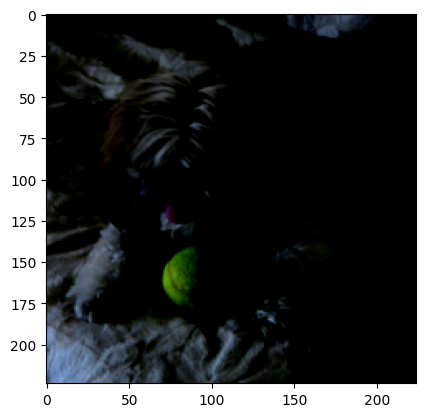

label: 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


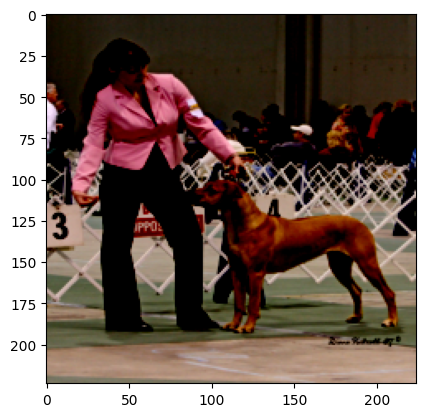

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label: 2


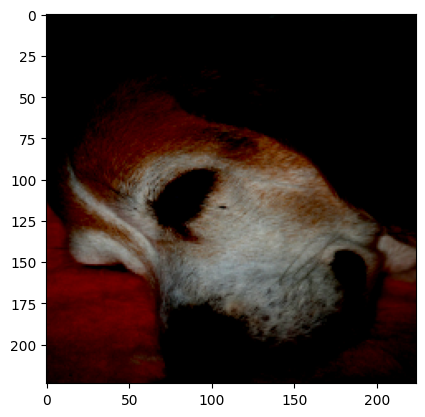

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label: 3


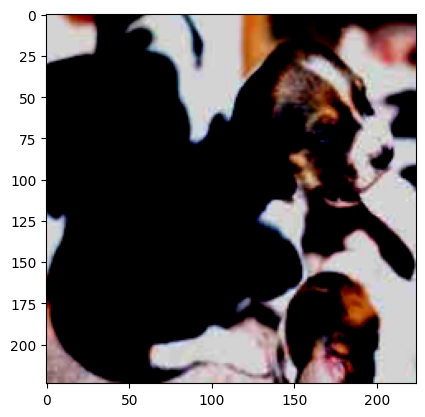

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label: 4


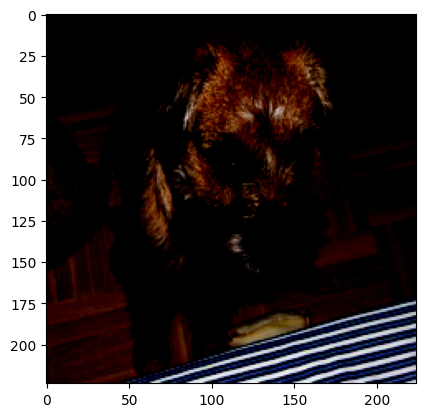

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label: 5


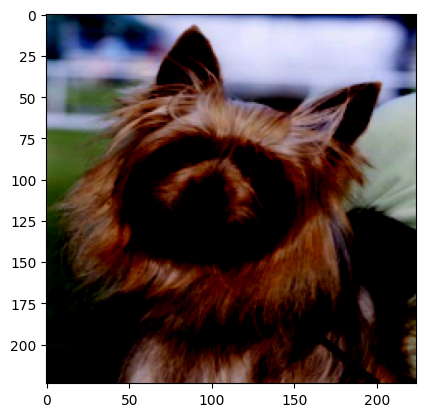

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label: 6


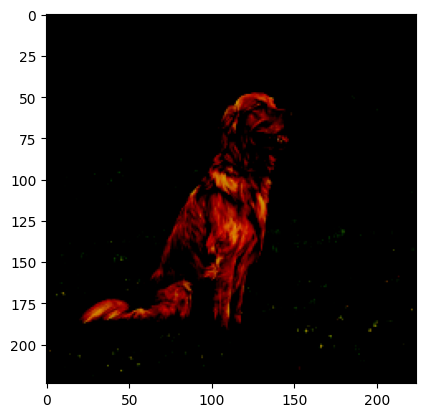

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label: 7


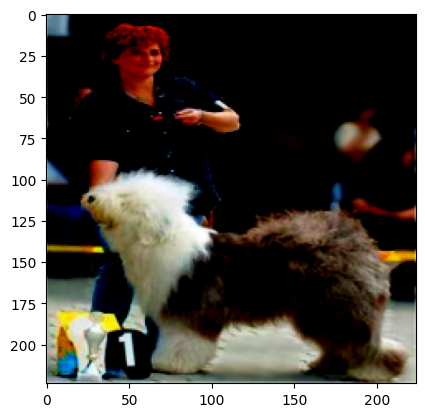

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label: 8


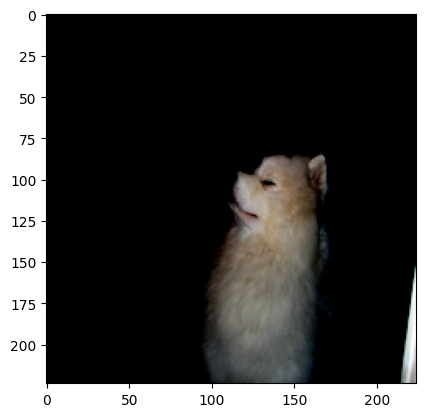

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label: 9


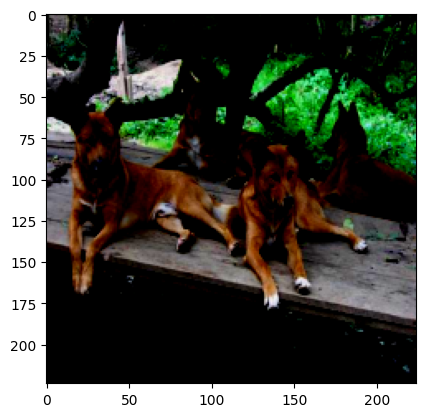

In [6]:
def test_transform_to_224_by_224():
    data = datasets.ImageFolder(TRAIN_DATA_PATH, transform=transformations)
    for i in range(0, len(data), 1000):
        # idx = random.random() * len(data)
        idx = i
        img = data[idx][0]
        label = data[idx][1]
        print(f'label: {label}')
        # show the image
        plt.imshow(img.permute(1, 2, 0))
        plt.show();

        # # Check the shape
        # assert img.shape == (3, 224, 224)
        # # Check the range
        # assert torch.min(img) >= -1
        # assert torch.max(img) <= 1

test_transform_to_224_by_224()

### 2.4 - Dataset Loaders

In [7]:
full_transformed_training_dataset = datasets.ImageFolder(
    TRAIN_DATA_PATH,
    transform=transformations
)

In [8]:
training_dataset_loader = torch.utils.data.DataLoader(
    full_transformed_training_dataset, batch_size=64, shuffle=True, num_workers=4
)

In [9]:
# test_dataset = datasets.ImageFolder(
#     TEST_DATA_PATH,
#     transform=transformations
# )

In [10]:
# test_dataset_loader = torch.utils.data.DataLoader(
#     test_dataset, batch_size=64, shuffle=False, num_workers=4
# )

## 3 - Model

## 3.2 - Create 'ResidualBlock'

In [11]:
import torch
from torch import nn


class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = self.relu(out)
        return out


## 3.3 - Create 'ResNet'

In [12]:
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 64

        self.num_classes = num_classes

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        # self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        # self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        # self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        # self.linear = nn.Linear(512, num_classes)


    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)


    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        # out = self.layer2(out)
        # out = self.layer3(out)
        # out = self.layer4(out)
        out = out.view(out.size(0), -1)
        # out = self.linear(out)

        in_features = out.size(1)
        linear = nn.Linear(in_features=in_features, out_features=self.num_classes)
        out = linear(out)

        return out


## 3.4 - Optimiser 

In [13]:
# Instantiate the network
net = ResNet(ResidualBlock, [3, 4, 6, 3])


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(net.parameters(), lr=0.001, momentum=0.9)
optimizer = torch.optim.SGD(net.parameters(), lr=0.005, weight_decay=0.0005, momentum=0.9)


# # Move the network to GPU if available
# if torch.cuda.is_available():
#     net = net.cuda()

In [14]:
# # import wandb


# # # Initialize wandb
# # wandb.init(project="resnet-training")




# # Training loop
# for epoch in range(10):  # loop over the dataset multiple times
#     running_loss = 0.0
#     for i, data in enumerate(training_dataset_loader, 0):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data
#         if torch.cuda.is_available():
#             inputs = inputs.cuda()
#             labels = labels.cuda()


#         # zero the parameter gradients
#         optimizer.zero_grad()


#         # forward + backward + optimize
#         outputs = net(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()


#         # print statistics
#         running_loss += loss.item()
#         if i % 2000 == 1999:    # print every 2000 mini-batches
#             print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0


#         # # Log the loss to wandb
#         # wandb.log({"loss": running_loss})


# print('Finished Training')


## 4 - Reference Model

In [15]:
import torchvision

reference_model = torchvision.models.resnet18()
reference_model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(reference_model.parameters(), lr=0.0005, weight_decay=0.0001, momentum=0.9)

In [19]:
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# from sklearn.model_selection import KFold
# import time

# # Define learning rate scheduler
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

# K_FOLDS = 5
# kfold = KFold(n_splits=K_FOLDS, shuffle=True)

# for epoch in range(35):
#     print(f'Epoch [{epoch + 1}/{35}] starts...')
#     average_loss = 0.0

#     # K-Fold Cross Validation
#     for fold, (training_indices, validation_indices) in enumerate(kfold.split(full_original_training_dataset)):
#         reference_model.train()  # Set model to training mode
#         running_loss = 0.0
#         fold_start_time = time.time()
#         print(f'Epoch [{epoch + 1}/{35}] Fold {fold + 1} starts...')

#         train_set = torch.utils.data.dataset.Subset(full_original_training_dataset, training_indices)
#         val_set = torch.utils.data.dataset.Subset(full_original_training_dataset, validation_indices)

#         training_dataset_loader = torch.utils.data.DataLoader(
#             train_set, batch_size=64, shuffle=True, num_workers=4
#         )
#         validation_dataset_loader = torch.utils.data.DataLoader(
#             val_set, batch_size=64, shuffle=True, num_workers=4
#         )
#         print(f'Train and validation dataset loaders created...')

#         # for i, data in enumerate(train_loader, 0):
#         for i, data in enumerate(training_dataset_loader, 0):
#             start_time = time.time()
#             # print(f'Epoch [{epoch + 1}] fold {fold + 1} batch {i + 1} starts...')
#             inputs, labels = data
#             inputs, labels = inputs.to(device), labels.to(device)
#             optimizer.zero_grad()

#             outputs = reference_model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()
#             # print(f'Epoch [{epoch + 1}] fold {fold + 1} batch {i + 1} ends. Time: {time.time() - start_time:.2f}s')

#         # train_loss = running_loss / len(train_loader)
#         train_loss = running_loss / len(training_dataset_loader)
#         print(f'Epoch [{epoch + 1}] fold {fold + 1} training loss: {train_loss:.3f}')

#         # Validation phase
#         print(f'Epoch [{epoch + 1}] fold {fold + 1} validation phase starts...')
#         reference_model.eval()  # Set model to evaluation mode
#         val_running_loss = 0.0
#         val_correct = 0
#         val_total = 0
#         i_batch = 0
#         with torch.no_grad():
#             # for data in test_loader:  # Assuming test_loader is used as a validation loader
#             for data in validation_dataset_loader:
#                 # print(f'Epoch [{epoch + 1}] fold {fold + 1} validation batch {i_batch + 1} starts...')
#                 inputs, labels = data
#                 inputs, labels = inputs.to(device), labels.to(device)

#                 outputs = reference_model(inputs)
#                 loss = criterion(outputs, labels)

#                 val_running_loss += loss.item()
#                 _, predicted = torch.max(outputs.data, 1)
#                 val_total += labels.size(0)
#                 val_correct += (predicted == labels).sum().item()
#                 # print(f'Epoch [{epoch + 1}] fold {fold + 1} validation batch {i_batch + 1} ends. Took: {time.time() - start_time:.2f}s')
#                 # i_batch += 1

#         val_loss = val_running_loss / len(validation_dataset_loader)
#         val_accuracy = 100 * val_correct / val_total
#         print(f'Epoch [{epoch + 1}] fold {fold + 1} validation loss: {val_loss:.3f}, accuracy: {val_accuracy:.2f}%')
#         print(f'Epoch [{epoch + 1}] fold {fold + 1} validation phase ends. Took: {time.time() - fold_start_time:.2f}s')

#         average_loss += val_loss

#     average_loss /= K_FOLDS
#     print(f'Epoch [{epoch + 1}/{35}] average validation loss: {average_loss:.3f}')

#     # # Update the LR scheduler with validation loss
#     # scheduler.step(val_loss)
#     # print(f'LR: {scheduler.get_last_lr()}')



Epoch [1/35] starts...
Epoch [1/35] Fold 1 starts...
Train and validation dataset loaders created...
Epoch [1] fold 1 training loss: 2.119
Epoch [1] fold 1 validation phase starts...
Epoch [1] fold 1 validation loss: 2.106, accuracy: 23.49%
Epoch [1] fold 1 validation phase ends. Took: 65.76s
Epoch [1/35] Fold 2 starts...
Train and validation dataset loaders created...
Epoch [1] fold 2 training loss: 2.056
Epoch [1] fold 2 validation phase starts...
Epoch [1] fold 2 validation loss: 2.018, accuracy: 25.26%
Epoch [1] fold 2 validation phase ends. Took: 65.91s
Epoch [1/35] Fold 3 starts...
Train and validation dataset loaders created...
Epoch [1] fold 3 training loss: 1.996
Epoch [1] fold 3 validation phase starts...
Epoch [1] fold 3 validation loss: 1.944, accuracy: 28.59%
Epoch [1] fold 3 validation phase ends. Took: 66.09s
Epoch [1/35] Fold 4 starts...
Train and validation dataset loaders created...
Epoch [1] fold 4 training loss: 1.931
Epoch [1] fold 4 validation phase starts...
Epoc

KeyboardInterrupt: 

In [21]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import KFold
import time

# Define learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

K_FOLDS = 5
kfold = KFold(n_splits=K_FOLDS, shuffle=True)

for epoch in range(35):
    print(f'Epoch [{epoch + 1}/{35}] starts...')
    average_loss = 0.0

    # Use KFold to split the dataset into training and validation sets...
    for fold, (training_indices, validation_indices) in enumerate(kfold.split(full_transformed_training_dataset)):
        reference_model.train()  # Set model to training mode
        running_loss = 0.0
        fold_start_time = time.time()
        print(f'Epoch [{epoch + 1}/{35}] Fold {fold + 1} starts...')

        train_set = torch.utils.data.dataset.Subset(full_transformed_training_dataset, training_indices)
        val_set = torch.utils.data.dataset.Subset(full_transformed_training_dataset, validation_indices)

        training_dataset_loader = torch.utils.data.DataLoader(
            train_set, batch_size=64, shuffle=True, num_workers=4
        )
        validation_dataset_loader = torch.utils.data.DataLoader(
            val_set, batch_size=64, shuffle=True, num_workers=4
        )
        print(f'Train and validation dataset loaders created...')

        # for i, data in enumerate(train_loader, 0):
        for i, data in enumerate(training_dataset_loader, 0):
            start_time = time.time()
            # print(f'Epoch [{epoch + 1}] fold {fold + 1} batch {i + 1} starts...')
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = reference_model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            # print(f'Epoch [{epoch + 1}] fold {fold + 1} batch {i + 1} ends. Time: {time.time() - start_time:.2f}s')

        # train_loss = running_loss / len(train_loader)
        train_loss = running_loss / len(training_dataset_loader)
        print(f'Epoch [{epoch + 1}] fold {fold + 1} training loss: {train_loss:.3f}')

        # Validation phase
        print(f'Epoch [{epoch + 1}] fold {fold + 1} validation phase starts...')
        reference_model.eval()  # Set model to evaluation mode
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        i_batch = 0
        with torch.no_grad():
            # for data in test_loader:  # Assuming test_loader is used as a validation loader
            for data in validation_dataset_loader:
                # print(f'Epoch [{epoch + 1}] fold {fold + 1} validation batch {i_batch + 1} starts...')
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = reference_model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
                # print(f'Epoch [{epoch + 1}] fold {fold + 1} validation batch {i_batch + 1} ends. Took: {time.time() - start_time:.2f}s')
                # i_batch += 1

        val_loss = val_running_loss / len(validation_dataset_loader)
        val_accuracy = 100 * val_correct / val_total
        print(f'Epoch [{epoch + 1}] fold {fold + 1} validation loss: {val_loss:.3f}, accuracy: {val_accuracy:.2f}%')
        print(f'Epoch [{epoch + 1}] fold {fold + 1} validation phase ends. Took: {time.time() - fold_start_time:.2f}s')

        average_loss += val_loss

        break # 1 fold only

    average_loss /= K_FOLDS
    # print(f'Epoch [{epoch + 1}/{35}] average validation loss: {average_loss:.3f}')

    # # Update the LR scheduler with validation loss
    # scheduler.step(val_loss)
    # print(f'LR: {scheduler.get_last_lr()}')



Epoch [1/35] starts...
Epoch [1/35] Fold 1 starts...
Train and validation dataset loaders created...
Epoch [1] fold 1 training loss: 1.456
Epoch [1] fold 1 validation phase starts...
Epoch [1] fold 1 validation loss: 1.587, accuracy: 44.49%
Epoch [1] fold 1 validation phase ends. Took: 66.10s
Epoch [2/35] starts...
Epoch [2/35] Fold 1 starts...
Train and validation dataset loaders created...
Epoch [2] fold 1 training loss: 1.431
Epoch [2] fold 1 validation phase starts...
Epoch [2] fold 1 validation loss: 1.344, accuracy: 53.07%
Epoch [2] fold 1 validation phase ends. Took: 66.06s
Epoch [3/35] starts...
Epoch [3/35] Fold 1 starts...
Train and validation dataset loaders created...
Epoch [3] fold 1 training loss: 1.377
Epoch [3] fold 1 validation phase starts...
Epoch [3] fold 1 validation loss: 1.395, accuracy: 50.14%
Epoch [3] fold 1 validation phase ends. Took: 65.50s
Epoch [4/35] starts...
Epoch [4/35] Fold 1 starts...
Train and validation dataset loaders created...
Epoch [4] fold 1 

In [23]:
torch.save(reference_model.state_dict(), "model1_statedict")
torch.save(reference_model, "model1_complete")

In [29]:
# from PIL import Image
# def test_predict():
#     # Create the preprocessing transformation here
#     # transform = transforms.ToTensor()

#     # load your image(s)
#     img_path = "data/test/test/n02115641_52552.JPEG"
#     img = Image.open(img_path)

#     # Transform
#     # input = transform(img)
#     input = transformations(img)
#     # input.todevice(device)

#     # unsqueeze batch dimension, in case you are dealing with a single image
#     # input = input.unsquueeze(0)

#     # Set model to eval
#     reference_model.eval()

#     # Get prediction
#     output = reference_model(input)
#     print(output)
#     return output

# test_predict()


In [31]:
import numpy as np
def test_predict(test_images):
    reference_model.eval()

    count = test_images.shape[0]
    result_np = []

    for idx in range(0, count):
        # print(idx)
        img = test_images[idx, :, :, :]
        img = np.expand_dims(img, axis=0)
        img = torch.Tensor(img).permute(0, 3, 1, 2).to(device)
        # print(img.shape)
        pred = reference_model(img)
        pred_np = pred.cpu().detach().numpy()
        for elem in pred_np:
            result_np.append(elem)
    return result_np

# test_predict(np.random.rand(10, 224, 224, 3))

In [38]:
def get_test_images():
    test_images = []
    for i in range(0, 10):
        # Open images from TEST_DATA_PATH
        img = Image.open(f"{TEST_DATA_PATH}/n02115641_52552.JPEG")
        img = transformations(img)
        test_images.append(img)
    # convert to numpy array
    test_images = np.array([np.array(img) for img in test_images])
    print(test_images.shape)
    return test_images



In [40]:
test_images = get_test_images()

(10, 3, 224, 224)


In [42]:
# test_predict(test_images)


In [45]:
# import torch
# from torchvision import transforms
# from torchvision.datasets import ImageFolder
# from torch.utils.data import DataLoader
# import os

# # # Step 1: Load your trained model
# # model = # Load your model here (e.g., `torch.load('model.pth')`)
# # model.eval()  # Set the model to evaluation mode

# # # Step 2: Define the image transformations
# # transform = transforms.Compose([
# #     transforms.Resize((224, 224)),  # Example size, adjust to your model's input
# #     transforms.ToTensor(),
# #     # Include normalization if your model was trained with it
# #     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# # ])

# # Step 3: Create a Dataset and DataLoader
# # image_folder_path = 'path_to_your_folder'  # Replace with your folder path
# # image_folder_path = TEST_DATA_PATH
# image_folder_path = 'data/test'
# dataset = ImageFolder(root=image_folder_path, transform=transformations)
# dataloader = DataLoader(dataset, batch_size=32, shuffle=False)  # Adjust batch size

# # Step 4: Predict and process the predictions
# class_labels = dataset.classes

# for images, _ in dataloader:
#     outputs = reference_model(images)
#     _, predicted = torch.max(outputs, 1)

#     for label in predicted:
#         print(class_labels[label])


In [74]:
def test_predict():
    reference_model.eval()  # Set model to evaluation mode

    test_dataset = datasets.ImageFolder(
        'data/test',
        transform=transformations
    )
    test_dataset_loader = torch.utils.data.DataLoader(
        test_dataset, batch_size=64, shuffle=False, num_workers=4
    )

    counter = 0
    sample_idx = 0

    with open('submit.csv', 'w') as f:
        f.write('ID,prediction\n')
        with torch.no_grad():
            for data in test_dataset_loader:

                inputs, labels = data

                # img_0 = inputs[0]
                # plt.imshow(img_0.permute(1, 2, 0))
                # plt.axis('off')
                # plt.show();

                # plt.imshow(img.permute(1, 2, 0))
                # plt.show();

                inputs, labels = inputs.to(device), labels.to(device)


                outputs = reference_model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                for label in predicted:
                    # file_name = test_dataset.samples[label][0].split('/')[-1]
                    file_name = test_dataset.samples[sample_idx][0].split('/')[-1]
                    sample_idx += 1
                    # remove .JPEG
                    file_name = file_name[:-5]
                    f.write(f'{file_name},{label.item()}\n')
                    # counter += 1
                    # if counter == 10:
                    #     break
                # if counter == 10:
                #     break
                # print(predicted)
                # for label in predicted:
                #     print(label.item())
                #     print(f'Prediction: {DOG_BREEDS[label.item()][0] + 1}. {DOG_BREEDS[label.item()][1]} ({DOG_BREEDS[label.item()][2]})')
                #     if counter == 10:
                #         break
                #     counter += 1
                # if counter == 10:
                #     break


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


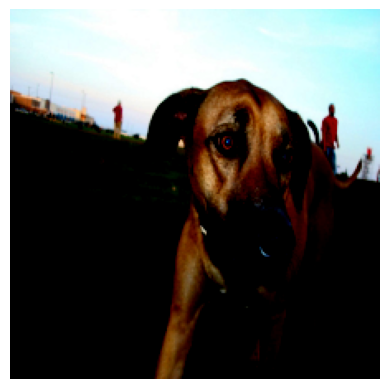

4
Prediction: 5. Border Terrier (https://en.wikipedia.org/wiki/Border_Terrier)
2
Prediction: 3. Beagle (https://en.wikipedia.org/wiki/Beagle)
4
Prediction: 5. Border Terrier (https://en.wikipedia.org/wiki/Border_Terrier)
6
Prediction: 7. Golden Retriever (https://en.wikipedia.org/wiki/Golden_Retriever)
1
Prediction: 2. Rhodesian Ridgeback (https://en.wikipedia.org/wiki/Rhodesian_Ridgeback)
4
Prediction: 5. Border Terrier (https://en.wikipedia.org/wiki/Border_Terrier)
1
Prediction: 2. Rhodesian Ridgeback (https://en.wikipedia.org/wiki/Rhodesian_Ridgeback)
0
Prediction: 1. Zuchon (https://simple.wikipedia.org/wiki/Zuchon)
2
Prediction: 3. Beagle (https://en.wikipedia.org/wiki/Beagle)
2
Prediction: 3. Beagle (https://en.wikipedia.org/wiki/Beagle)
5
Prediction: 6. Australian Terrier (https://en.wikipedia.org/wiki/Australian_Terrier)


In [64]:
test_predict()

In [75]:
test_predict()

In [77]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import KFold
import time

# Define learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

n = len(full_transformed_training_dataset)
n_val = int(0.2 * n)
n_train = n - n_val

train_set, val_set = torch.utils.data.random_split(full_transformed_training_dataset, [n_train, n_val])

training_dataset_loader = torch.utils.data.DataLoader(
    train_set, batch_size=64, shuffle=True, num_workers=4
)
validation_dataset_loader = torch.utils.data.DataLoader(
    val_set, batch_size=64, shuffle=False, num_workers=4
)

import os
import datetime

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_folder = f'models/model-{current_time}'
os.makedirs(model_folder, exist_ok=True)

for epoch in range(35):
    print(f'Epoch [{epoch + 1}/{35}] starts...')
    average_loss = 0.0

    reference_model.train()  # Set model to training mode
    running_loss = 0.0
    fold_start_time = time.time()
    print(f'Epoch [{epoch + 1}/{35}] Fold {fold + 1} starts...')

    # for i, data in enumerate(train_loader, 0):
    for i, data in enumerate(training_dataset_loader, 0):
        start_time = time.time()
        # print(f'Epoch [{epoch + 1}] fold {fold + 1} batch {i + 1} starts...')
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = reference_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        # print(f'Epoch [{epoch + 1}] fold {fold + 1} batch {i + 1} ends. Time: {time.time() - start_time:.2f}s')

    # train_loss = running_loss / len(train_loader)
    train_loss = running_loss / len(training_dataset_loader)
    print(f'Epoch [{epoch + 1}] fold {fold + 1} training loss: {train_loss:.3f}')

    # Validation phase
    print(f'Epoch [{epoch + 1}] fold {fold + 1} validation phase starts...')
    reference_model.eval()  # Set model to evaluation mode
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    i_batch = 0
    with torch.no_grad():
        # for data in test_loader:  # Assuming test_loader is used as a validation loader
        for data in validation_dataset_loader:
            # print(f'Epoch [{epoch + 1}] fold {fold + 1} validation batch {i_batch + 1} starts...')
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = reference_model(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            # print(f'Epoch [{epoch + 1}] fold {fold + 1} validation batch {i_batch + 1} ends. Took: {time.time() - start_time:.2f}s')
            # i_batch += 1

    epoch_model_folder = f'{model_folder}/epoch-{epoch + 1}'
    os.makedirs(epoch_model_folder, exist_ok=True)

    torch.save(reference_model.state_dict(), f'{epoch_model_folder}/model-{epoch + 1}-statedict')
    torch.save(reference_model, f'{epoch_model_folder}/model-{epoch + 1}-complete')

    val_loss = val_running_loss / len(validation_dataset_loader)
    val_accuracy = 100 * val_correct / val_total
    print(f'Epoch [{epoch + 1}] fold {fold + 1} validation loss: {val_loss:.3f}, accuracy: {val_accuracy:.2f}%')
    print(f'Epoch [{epoch + 1}] fold {fold + 1} validation phase ends. Took: {time.time() - fold_start_time:.2f}s')

    # # Update the LR scheduler with validation loss
    # scheduler.step(val_loss)
    # print(f'LR: {scheduler.get_last_lr()}')



Epoch [1/35] starts...
Epoch [1/35] Fold 1 starts...
Epoch [1] fold 1 training loss: 0.048
Epoch [1] fold 1 validation phase starts...
Epoch [1] fold 1 validation loss: 0.054, accuracy: 99.61%
Epoch [1] fold 1 validation phase ends. Took: 66.25s
Epoch [2/35] starts...
Epoch [2/35] Fold 1 starts...
Epoch [2] fold 1 training loss: 0.042
Epoch [2] fold 1 validation phase starts...
Epoch [2] fold 1 validation loss: 0.026, accuracy: 99.94%
Epoch [2] fold 1 validation phase ends. Took: 66.09s
Epoch [3/35] starts...
Epoch [3/35] Fold 1 starts...
Epoch [3] fold 1 training loss: 0.037
Epoch [3] fold 1 validation phase starts...
Epoch [3] fold 1 validation loss: 0.041, accuracy: 99.67%
Epoch [3] fold 1 validation phase ends. Took: 66.65s
Epoch [4/35] starts...
Epoch [4/35] Fold 1 starts...
Epoch [4] fold 1 training loss: 0.034
Epoch [4] fold 1 validation phase starts...
Epoch [4] fold 1 validation loss: 0.032, accuracy: 99.72%
Epoch [4] fold 1 validation phase ends. Took: 66.38s
Epoch [5/35] sta

KeyboardInterrupt: 

In [76]:
# # Create a folder with current date and time


# os.makedirs('models', exist_ok=True)

In [85]:
import torch
from torchvision.transforms import v2

# H, W = 32, 32
# img = torch.randint(0, 256, size=(3, H, W), dtype=torch.uint8)

# transforms_v2 = v2.Compose([
#     v2.RandomResizedCrop(size=(224, 224), antialias=True),
#     v2.RandomHorizontalFlip(p=0.5),
#     v2.ToDtype(torch.float32, scale=True),
#     v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

transforms_3 = transforms.Compose(
    [
        # transforms.Resize((224, 224)),  # Crop to 224 x 224 ?
        transforms.RandomResizedCrop(size=(224, 224),
                                    #  , scale=(0.08, 1.0), ratio=(3.0/4.0, 4.0/3.0), interpolation=2
                                    antialias=True
                                ),
        transforms.RandomHorizontalFlip(p=1),
        transforms.ToTensor(),  # Convert to Tensor before numeric manipulation (normalisation)
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        # Normalise to [0, 1] ?
    ]
)



In [86]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import KFold
import time

# Define learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)



full_transformed_training_dataset_v2 = datasets.ImageFolder(
    TRAIN_DATA_PATH,
    transform=transforms_3
)

n = len(full_transformed_training_dataset_v2)
n_val = int(0.2 * n)
n_train = n - n_val

train_set, val_set = torch.utils.data.random_split(
    full_transformed_training_dataset_v2, [n_train, n_val]
)

training_dataset_loader = torch.utils.data.DataLoader(
    train_set, batch_size=64, shuffle=True, num_workers=4
)
validation_dataset_loader = torch.utils.data.DataLoader(
    val_set, batch_size=64, shuffle=False, num_workers=4
)

import os
import datetime

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_folder = f'models/model-{current_time}'
os.makedirs(model_folder, exist_ok=True)

for epoch in range(35):
    print(f'Epoch [{epoch + 1}/{35}] starts...')
    average_loss = 0.0

    reference_model.train()  # Set model to training mode
    running_loss = 0.0
    fold_start_time = time.time()
    print(f'Epoch [{epoch + 1}/{35}] Fold {fold + 1} starts...')

    # for i, data in enumerate(train_loader, 0):
    for i, data in enumerate(training_dataset_loader, 0):
        start_time = time.time()
        # print(f'Epoch [{epoch + 1}] fold {fold + 1} batch {i + 1} starts...')
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = reference_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        # print(f'Epoch [{epoch + 1}] fold {fold + 1} batch {i + 1} ends. Time: {time.time() - start_time:.2f}s')

    # train_loss = running_loss / len(train_loader)
    train_loss = running_loss / len(training_dataset_loader)
    print(f'Epoch [{epoch + 1}] fold {fold + 1} training loss: {train_loss:.3f}')

    # Validation phase
    print(f'Epoch [{epoch + 1}] fold {fold + 1} validation phase starts...')
    reference_model.eval()  # Set model to evaluation mode
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    i_batch = 0
    with torch.no_grad():
        # for data in test_loader:  # Assuming test_loader is used as a validation loader
        for data in validation_dataset_loader:
            # print(f'Epoch [{epoch + 1}] fold {fold + 1} validation batch {i_batch + 1} starts...')
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = reference_model(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            # print(f'Epoch [{epoch + 1}] fold {fold + 1} validation batch {i_batch + 1} ends. Took: {time.time() - start_time:.2f}s')
            # i_batch += 1

    epoch_model_folder = f'{model_folder}/epoch-{epoch + 1}'
    os.makedirs(epoch_model_folder, exist_ok=True)

    torch.save(reference_model.state_dict(), f'{epoch_model_folder}/model-{epoch + 1}-statedict')
    torch.save(reference_model, f'{epoch_model_folder}/model-{epoch + 1}-complete')

    val_loss = val_running_loss / len(validation_dataset_loader)
    val_accuracy = 100 * val_correct / val_total
    print(f'Epoch [{epoch + 1}] fold {fold + 1} validation loss: {val_loss:.3f}, accuracy: {val_accuracy:.2f}%')
    print(f'Epoch [{epoch + 1}] fold {fold + 1} validation phase ends. Took: {time.time() - fold_start_time:.2f}s')

    # # Update the LR scheduler with validation loss
    # scheduler.step(val_loss)
    # print(f'LR: {scheduler.get_last_lr()}')



Epoch [1/35] starts...
Epoch [1/35] Fold 1 starts...


Epoch [1] fold 1 training loss: 1.105
Epoch [1] fold 1 validation phase starts...
Epoch [1] fold 1 validation loss: 1.128, accuracy: 62.66%
Epoch [1] fold 1 validation phase ends. Took: 66.61s
Epoch [2/35] starts...
Epoch [2/35] Fold 1 starts...
Epoch [2] fold 1 training loss: 1.084
Epoch [2] fold 1 validation phase starts...
Epoch [2] fold 1 validation loss: 1.167, accuracy: 60.17%
Epoch [2] fold 1 validation phase ends. Took: 66.97s
Epoch [3/35] starts...
Epoch [3/35] Fold 1 starts...
Epoch [3] fold 1 training loss: 1.111
Epoch [3] fold 1 validation phase starts...
Epoch [3] fold 1 validation loss: 1.296, accuracy: 57.29%
Epoch [3] fold 1 validation phase ends. Took: 67.07s
Epoch [4/35] starts...
Epoch [4/35] Fold 1 starts...
Epoch [4] fold 1 training loss: 1.076
Epoch [4] fold 1 validation phase starts...
Epoch [4] fold 1 validation loss: 1.489, accuracy: 55.57%
Epoch [4] fold 1 validation phase ends. Took: 66.76s
Epoch [5/35] starts...
Epoch [5/35] Fold 1 starts...
Epoch [5] fold 1